In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=5
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

I need to analyze the Hamiltonian equation to build the `HartreeFockHamiltonian` class. Let's proceed with answering the questions sequentially.

## Question 1: Dimension and Basis Order

Looking at the Hamiltonian, I see:

$\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$

Here, the creators and annihilators have indices for:
1. Orbital type: x, y for p-orbitals, and d for d-orbital
2. Momentum (k)
3. Spin (s)

The matrix $\HH_{\kk s}$ is 3×3, which corresponds to the three orbital types: $p_x$, $p_y$, and $d$.

So, the tuple D should include the spin and orbital flavor:
D = (|spin|, |orbital_flavor|) = (2, 3)

The basis order would be:
0: spin. Order: ↑, ↓
1: orbital. Order: $p_x$, $p_y$, $d$

## Question 2: Identifying Interacting Terms

Now, let's identify the expressions dependent on the expectation values (EXP-VAL DEPENDENT TERMS).

In the Hamiltonian, we have:
- $n^p$: The to

In [7]:
print(generated_code['thinking'])

I need to analyze the Hamiltonian equation to build the `HartreeFockHamiltonian` class. Let's proceed with answering the questions sequentially.

## Question 1: Dimension and Basis Order

Looking at the Hamiltonian, I see:

$\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$

Here, the creators and annihilators have indices for:
1. Orbital type: x, y for p-orbitals, and d for d-orbital
2. Momentum (k)
3. Spin (s)

The matrix $\HH_{\kk s}$ is 3×3, which corresponds to the three orbital types: $p_x$, $p_y$, and $d$.

So, the tuple D should include the spin and orbital flavor:
D = (|spin|, |orbital_flavor|) = (2, 3)

The basis order would be:
0: spin. Order: ↑, ↓
1: orbital. Order: $p_x$, $p_y$, $d$

## Question 2: Identifying Interacting Terms

Now, let's identify the expressions dependent on the expectation values (EXP-VAL DEPENDENT TERMS).

In the Hamiltonian, we have:
- $n^p$: The total density of holes on the oxygen sites
- $\eta$: Th

In [8]:
print(generated_code['text'])

# Answer:

## 1) Number of Flavors, D = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: px, py, d

## 2) EXP-VAL DEPENDENT TERMS: {
    "n^p": "Mean of `exp_val[0, 0, :] + exp_val[0, 1, :] + exp_val[1, 0, :] + exp_val[1, 1, :]`",
    "eta": "Mean of `exp_val[0, 0, :] + exp_val[1, 0, :] - exp_val[0, 1, :] - exp_val[1, 1, :]`",
    "n": "n^p + Mean of `exp_val[0, 2, :] + exp_val[1, 2, :]`",
    "mu": "2 * V_pd * n - V_pd * n^2"
}

TERMS:
- $\gamma_1(k_x)$ -> H[s, 0, s, 2, k] and H[s, 2, s, 0, k], NI
- $\gamma_1(k_y)$ -> H[s, 1, s, 2, k] and H[s, 2, s, 1, k], NI
- $\gamma_2(\kk)$ -> H[s, 0, s, 1, k] and H[s, 1, s, 0, k], NI
- $\xi_{x}$ -> H[s, 0, s, 0, k], I
- $\xi_{y}$ -> H[s, 1, s, 1, k], I
- $\xi_{d}$ -> H[s, 2, s, 2, k], I
- $f(n^{p}, \eta)$ -> Constant energy offset, I

## 3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a three-band Emery model.
    
    Args:
       

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a three-band Emery model.
    
    Args:
        N_shell (int): Number of shells in the Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'
        self.D = (2, 3)  # (spin, orbital)
        self.basis_order = {'0': 'spin', '1': 'orbital'}
        # Order for each flavor:
        # 0: spin up, spin down
        # 1: px, py, d

        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.k_space = generate_k_space(self.lattice, N_shell, self.a)
        self.N_k = self.k_space.sh

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_5.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

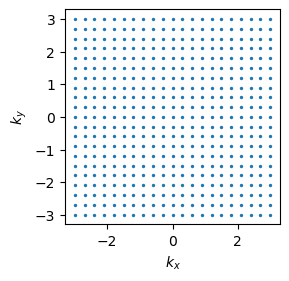

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

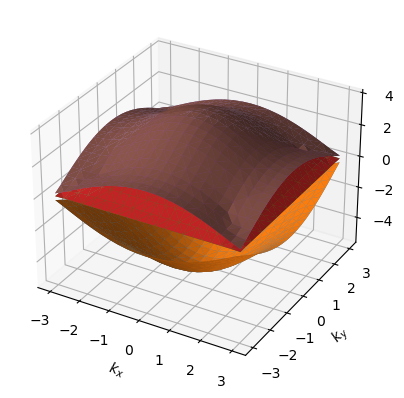

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

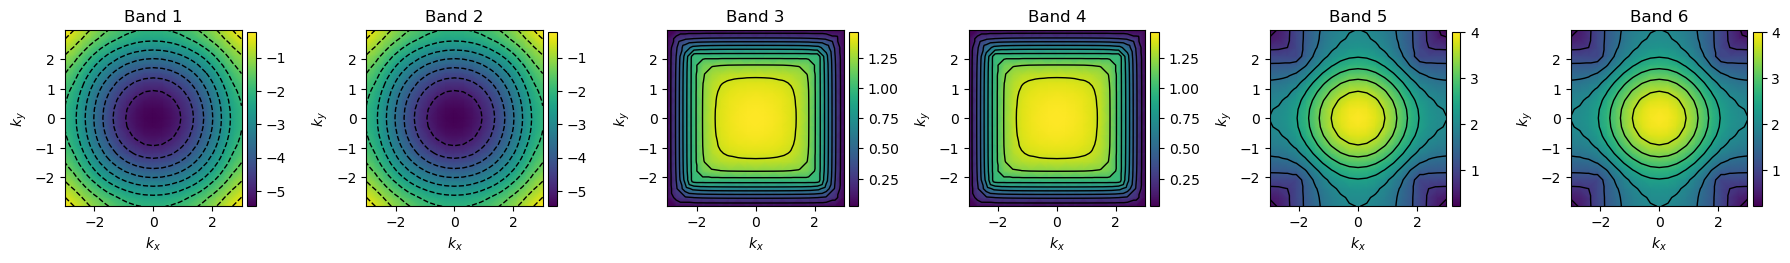

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 2


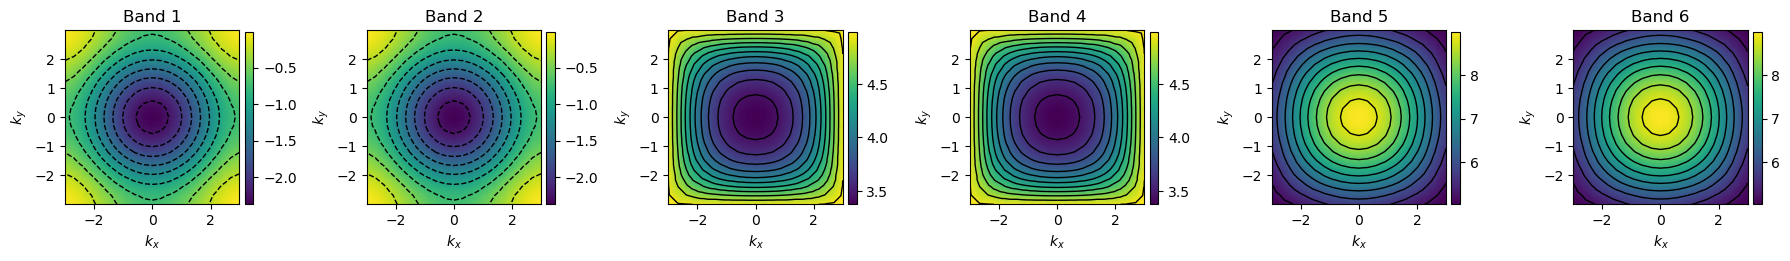

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 5


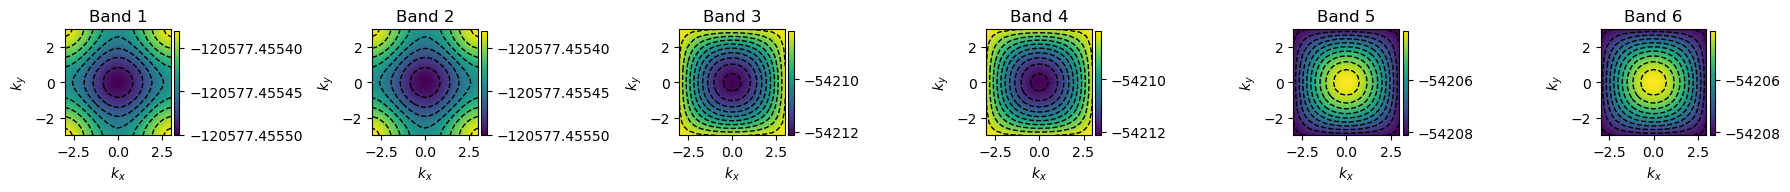

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 66365.32
U/T is 47049.12
mean_U is 21815.22


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this problem carefully by checking the provided figure against the rubric requirements.

The image shows a grid of blue dots arranged in a square pattern. The x-axis is labeled as k_x and ranges from approximately -3 to 3. The y-axis is labeled as k_y and also ranges from approximately -3 to 3. This appears to be a momentum space mesh (k-space) representation.

The rubric asks me to check:
1. If the image shows momentum space mesh in the first Brillouin zone of the concerned problem
2. The point group symmetry of the system

Let's analyze each point:

1. **Momentum space mesh in the first Brillouin zone**:
   - The image shows a grid of points in k-space (momentum space)
   - For a square lattice (as mentioned in the problem), the first Brillouin zone is a square in k-space with boundaries at k_x, k_y = ±π in reduced units
   - The figure shows a square region from approximately -3 to 3 in both k_x and k_y directions
 

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots shown in the image based on the rubric provided.

1. Identify the shape of the Brillouin zone boundary:
The plots show a square-shaped Brillouin zone boundary, which is appropriate for a square lattice. The x and y axes are labeled as k_x and k_y, and the plots extend from approximately -3 to 3 in both directions. This matches what's expected for a square lattice, so this point is correct.

2. Examine the symmetry of the energy distribution:

2.1 Identify the highest energy regions (yellow):
- In Bands 1 and 2: The highest energy regions (least negative, shown in yellow-green) are at the corners of the Brillouin zone.
- In Bands 3 and 4: The highest energy regions (yellow) are in the center forming a square shape.
- In Bands 5 and 6: The highest energy regions (yellow) are in the center forming a circular shape.

2.2 Trace the pattern of energy variation across the zone:
- Bands 1 and 2 show co

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this image systematically according to the rubric.

The image shows 6 false color plots labeled "Band 1" through "Band 6", each representing the energy distribution of a band in the first Brillouin zone after a self-consistent Hartree-Fock calculation.

1. First, identify the shape of the Brillouin zone boundary:
Looking at all 6 plots, the Brillouin zone appears to be a square defined by approximately -2 to 2 in both $k_x$ and $k_y$ directions. This matches what's expected for a square lattice, so this criterion is satisfied.

2. Examine the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- Band 1 & 2: Yellow regions are at the corners of the square
- Band 3 & 4: Yellow regions are at the edges of the square
- Band 5 & 6: Yellow regions are at the center of the square

2.2 Pattern of energy variation:
- Band 1 & 2: There's a circular/radial pattern, with energy decreasing from the corners to

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me analyze this image based on the rubric provided:

1. **Brillouin Zone Shape**: The image shows 6 band plots in a square-shaped Brillouin zone, with axes labeled kx and ky, ranging from approximately -2.5 to 2.5 in both directions. This is consistent with a square lattice, where the first Brillouin zone is indeed square-shaped.

2. **Symmetry of the Energy Distribution**:
   
   2.1 **Highest Energy Regions (Yellow)**:
   - For Bands 1-4: The energy distribution appears to have dark centers (blue/purple representing lower energies) with the higher energies at the edges.
   - For Bands 5-6: There's a clear central yellow region indicating high energy at the center of the Brillouin zone.

   2.2 **Pattern of Energy Variation**:
   - Bands 1 and 2 show concentric circular/elliptical contours, with lower energy at the center.
   - Bands 3 and 4 have similar patterns but slightly different energy scales.
   - Bands 5 and 6 show oppo

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '5' saved to final_answer.yaml
